# K-Means Clustering Example
This notebook provides a step-by-step example of how to perform K-Means clustering. We will:
1. Import necessary libraries.
2. Generate synthetic data with three distinct clusters.
3. Visualize the raw data.
4. Apply the K-Means algorithm to find the clusters.
5. Visualize the final results with cluster assignments and centroids.

## 1. Importing Libraries
First, we import the required libraries. We need NumPy for numerical operations, Pandas for data handling (though not heavily used in this specific example), Matplotlib for plotting, and `KMeans` from Scikit-learn for the clustering algorithm itself.

In [1]:
# NumPy is used for efficient numerical operations, especially array manipulation.
import numpy as np
# Pandas is a powerful library for data analysis and manipulation.
import pandas as pd
# Matplotlib is used for creating static, animated, and interactive visualizations.
import matplotlib.pyplot as plt
# KMeans is the clustering algorithm we'll use from the Scikit-learn library.
from sklearn.cluster import KMeans

## 2. Generating Synthetic Data
To demonstrate K-Means, we'll create our own dataset. We will generate three distinct groups (clusters) of data points in a 2D space. Using a random seed ensures that the same random data is generated every time the code is run, making our results reproducible.

In [2]:
# Set a random seed for reproducibility.
np.random.seed(42)

# Generate the first cluster of 100 data points centered around (2, 2).
# np.random.randn(100, 2) creates 100 pairs of (x, y) coordinates from a standard normal distribution.
data1 = np.random.randn(100, 2) + np.array([2, 2])

# Generate the second cluster of 100 data points centered around (-2, -2).
data2 = np.random.randn(100, 2) + np.array([-2, -2])

# Generate the third cluster of 100 data points centered around (2, -2).
data3 = np.random.randn(100, 2) + np.array([2, -2])

# Combine the three clusters into a single dataset using np.vstack (vertical stack).
# The final 'data' array will have 300 rows and 2 columns.
data = np.vstack([data1, data2, data3])

## 3. Visualizing the Raw Data
Before applying the clustering algorithm, it's always a good idea to visualize the data to see if there are any apparent patterns.

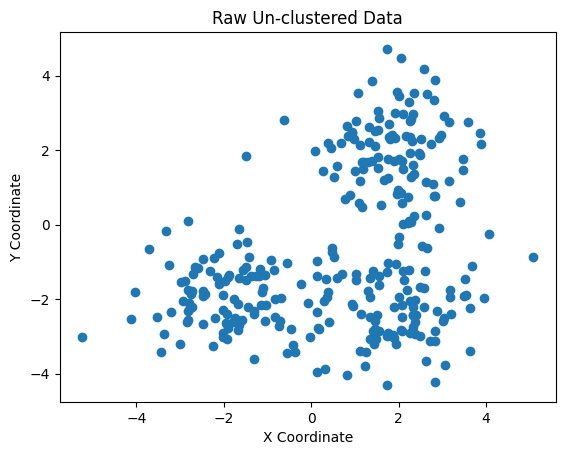

In [3]:
# Create a scatter plot of the generated data points.
# data[:, 0] selects all rows from the first column (x-coordinates).
# data[:, 1] selects all rows from the second column (y-coordinates).
plt.scatter(data[:, 0], data[:, 1])
plt.title('Raw Un-clustered Data')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

## 4. Applying the K-Means Algorithm
Now, we'll create an instance of the `KMeans` model and fit it to our data. We need to specify `n_clusters`, which is the number of clusters we expect to find. Since we generated the data with three groups, we'll set it to 3.

In [4]:
# Create a KMeans model instance with 3 clusters.
# `random_state` is set for reproducibility of the clustering result.
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')

# Fit the model to the data. This is where the algorithm runs and finds the clusters.
kmeans.fit(data)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


## 5. Getting Cluster Information
After fitting the model, we can extract useful information, such as the coordinates of the cluster centers (centroids) and the cluster label assigned to each data point.

In [5]:
# Get the coordinates of the cluster centers.
centroids = kmeans.cluster_centers_

# Get the label (0, 1, or 2) assigned to each data point.
labels = kmeans.labels_

# Print the centroids and the first 10 labels to see the output.
print("Centroids:")
print(centroids)
print("\nFirst 10 Labels:")
print(labels[:10])

Centroids:
[[-1.97143199 -1.9648565 ]
 [ 1.87369694 -2.21510275]
 [ 1.87314766  1.97606225]]

First 10 Labels:
[2 2 2 2 2 2 2 2 2 2]


## 6. Visualizing the Clustered Results
Finally, we'll create another scatter plot. This time, we will color the points based on their assigned cluster labels and mark the location of the final centroids. This visualization clearly shows how the K-Means algorithm has grouped the data.

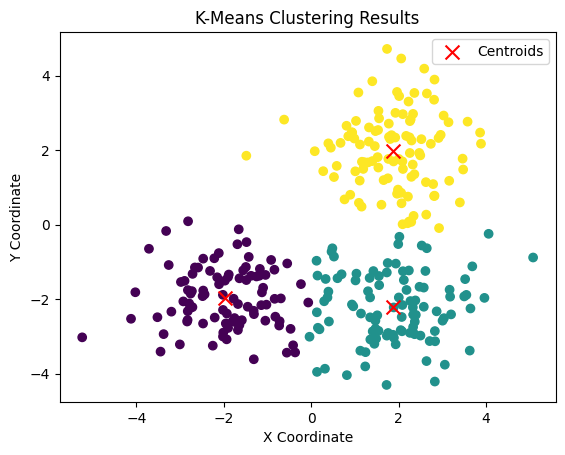

In [6]:
# Create a new scatter plot, coloring the points by their assigned cluster label.
# `c=labels` maps the integer labels to colors using the specified colormap.
# `cmap='viridis'` is a popular and visually distinct color map.
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')

# Plot the cluster centroids on top of the data points.
# We use a red 'x' to make them stand out.
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')

# Add titles and labels for clarity.
plt.title('K-Means Clustering Results')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()